In [2]:
import glob
import re
import xarray as xr
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt


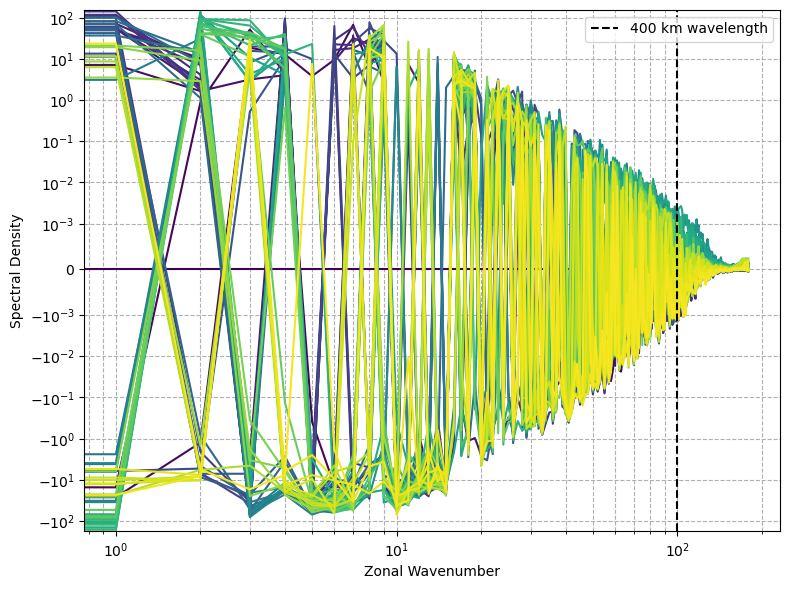

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

plt.figure(figsize=(8, 6))



colors = sns.color_palette('viridis', 40)
models = sns.color_palette("hls", 6)


S2S = False
GenCast = False
GraphCast = False
HRES = False
ENS = False
CESM2 = True
ERA5 = False

##################
# CESM2
##################
if CESM2:
    data = xr.open_dataset("/geodata2/Gencast/CESM2/1990_daily_spectra_uv.nc").isel(level=5)
    colors = sns.color_palette('viridis', 365)
    for t in range(0,365,5):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t) - spc.isel(time=0)
        valid_indices = np.where(np.isfinite(spc))
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

##################
# ERA5
##################
if ERA5:
    data = xr.open_dataset("/geodata2/Gencast/CESM2/1990_daily_spectra_uv.nc").mean("level")
    colors = sns.color_palette('viridis', 365)
    for t in range(0,365,5):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t) - spc.isel(time=0)
        valid_indices = np.where(np.isfinite(spc))
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

##################
# S2S
##################
if S2S:
    data = xr.open_zarr("/data/GC_output/analysis/NWP/S2S/2021/spectra.zarr").sel(level=300).mean("initial_time").mean("ensemble")
    colors = sns.color_palette('viridis', 31)
    for t in range(0, 31):
        x = data['wavenumber']
        spc = data['spectrum'].isel(time=t) - data['spectrum'].isel(time=0)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

##################
# GenCast
##################
if GenCast:
    data = xr.open_zarr("/geodata2/Gencast/output/2021/spectra.zarr").mean("initial_time").mean("ensemble")
    input = xr.open_zarr("/geodata2/Gencast/input/2021/spectra.zarr")["spectrum"].mean("initial_time")
    colors = sns.color_palette('viridis', 40)
    for t in range(0, 40):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t) - input.isel(time=0)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])
        plt.plot(x[1:], input.isel(time=0)[1:] - input.isel(time=0)[1:], color=colors[0])

##################
# GraphCast
##################
if GraphCast:
    data = xr.open_zarr(f"/geodata2/S2S/DL/GC_output/2021/spectra.zarr")
    input = xr.open_zarr(f"/geodata2/S2S/DL/GC_input/2021/spectra.zarr")['spectrum'].mean("initial_time")
    colors = sns.color_palette('viridis', 60)
    for t in range(0, 60):
        x = data['wavenumber']
        spc = data['spectrum'].mean("initial_time")
        spc = spc.isel(time=t) - input.isel(time=1)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])
        plt.plot(x[1:], input.isel(time=0)[1:] - input.isel(time=0)[1:], color=colors[0])

##################
# IFS-HRES
##################
if HRES:
    data = xr.open_zarr(f"/data/GC_output/analysis/NWP/IFS-HRES/2021/spectra.zarr")
    colors = sns.color_palette('viridis', 41)
    for t in range(0, 41):
        x = data['wavenumber']
        spc = data['spectrum'].mean("initial_time")
        spc = spc.isel(time=t) - spc.isel(time=0)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

##################
# IFS-ENS
##################
if ENS:
    data = xr.open_zarr("/geodata2/S2S/DL/GC_output/IFS-ENS/spectra.zarr").sel(level=300).mean("initial_time").mean("ensemble")
    colors = sns.color_palette('viridis', 31)
    for t in range(0, 31):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t) - spc.isel(time=0)
        valid_indices = np.where(np.isfinite(spc)) 
        plt.plot(x[valid_indices], spc[valid_indices], color=colors[t])

# 1. 400km 파장에 해당하는 wavenumber에 수직선 추가
# zonal wavenumber index at wavelength 400km

# k = 2 * pi * circumference / wavelength
k_400 = 2*np.pi * 6371229/400000


plt.axvline(x=k_400, color='k', linestyle='--', label='400 km wavelength')

k_min = x[1].item()
k_max = x[-1].item()
k_vals = np.logspace(np.log10(k_min), np.log10(k_max), 100)

y_ref = 1e-3

A_5_3 = y_ref / (k_400 ** (-5/3))
trend_5_3 = A_5_3 * k_vals ** (-5/3)

A_3 = y_ref / (k_400 ** (-3))
trend_3 = A_3 * k_vals ** (-3)

# plt.loglog(k_vals[:], trend_5_3[:], 'g--', label=r'$k^{-5/3}$', alpha=0.5)
# plt.loglog(k_vals[:], trend_3[:], 'y--', label=r'$k^{-3}$', alpha=0.5)

plt.xlabel('Zonal Wavenumber')
plt.ylabel('Spectral Density')
# plt.title('GenCast Kinetic Energy Spectrum\n 2021, 52 week-average\n12-hourly, 20 days')
plt.legend()
plt.xscale('log')
plt.yscale("symlog", linthresh=1e-3)
plt.grid(True, which='both', ls='--')
# plt.ylim(1e-4, 1e3)
plt.tight_layout()
plt.show()
# plt.savefig("1990 CESM2_KE diff.png")


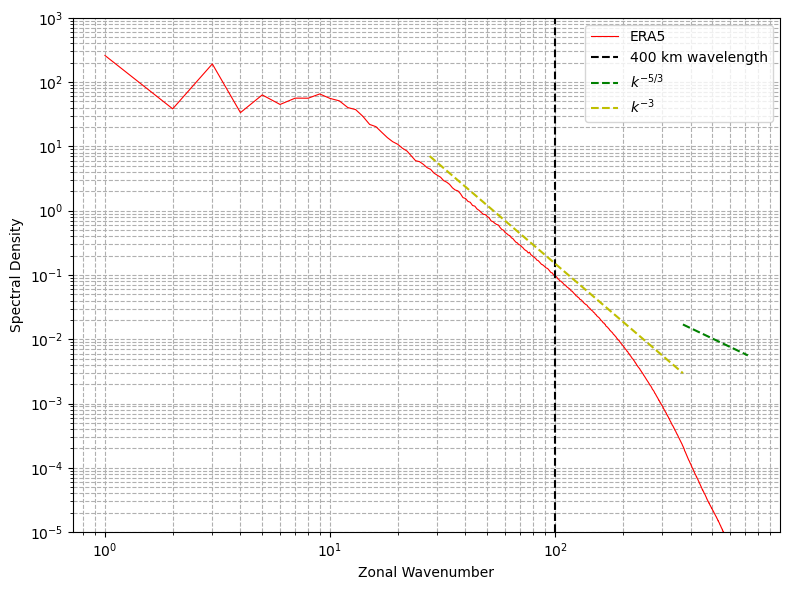

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr

plt.figure(figsize=(8, 6))



colors = sns.color_palette('viridis', 40)
models = sns.color_palette("hls", 6)

S2S = False
GenCast = False
GraphCast = False
HRES = False
ENS = False
CESM2 = True
ERA5 = False

###################
# S2S
###################
if S2S:
    data = xr.open_zarr("/data/GC_output/analysis/NWP/S2S/2021/spectra.zarr").sel(level=300).mean("initial_time").mean("ensemble")
    x = data['wavenumber']
    colors = sns.color_palette('viridis', 31)
    for t in range(0, 31):
        spc = data['spectrum'].isel(time=t)# - data['spectrum'].isel(time=0)
        plt.loglog(x[1:], spc[1:], color=colors[t])


###################
# GenCast
###################
if GenCast:
    data = xr.open_zarr("/geodata2/Gencast/output/2021/spectra.zarr").mean("initial_time").mean("ensemble")
    colors = sns.color_palette('mako', 40)
    for t in range(0, 40):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t)# - input.isel(time=0)
        plt.loglog(x[1:], spc[1:], color=colors[t], linewidth=1)
        
##################
# GraphCast
##################
if GraphCast:
    data = xr.open_zarr("/geodata2/S2S/DL/GC_output/2021/spectra.zarr").mean("initial_time")
    colors = sns.color_palette('viridis', 60)
    for t in range(0, 60, 2):
        x = data['wavenumber']
        spc = data['spectrum']
        spc = spc.isel(time=t)
        plt.loglog(x[1:], spc[1:], color=colors[t], alpha = (t+40)/120, linewidth=0.8)


##################
# IFS-HRES
##################
if HRES:
    HRES = xr.open_zarr("/data/GC_output/analysis/NWP/IFS-HRES/2021/spectra.zarr").mean("initial_time")
    colors = sns.color_palette('viridis', 41)
    for t in range(0, 41):
        x = HRES['wavenumber']
        spc = HRES['spectrum']
        spc = spc.isel(time=t)
        plt.loglog(x[1:], spc[1:], color=colors[t])

##################
# IFS-ENS
##################
if ENS:
    data = xr.open_zarr("/geodata2/S2S/DL/GC_output/IFS-ENS/spectra.zarr").mean("initial_time").mean("ensemble").sel(level=300)
    colors = sns.color_palette('rocket', 31)
    for t in range(0, 31):
        x = data['wavenumber']
        spc = data['spectrum'].isel(time=t)
        plt.loglog(x[1:], spc[1:], color=colors[t], linewidth=0.8)

##################
# CESM2
##################
if CESM2:
    data = xr.open_dataset("/geodata2/Gencast/CESM2/1990_daily_spectra_uv.nc").mean("level")#.isel(level=5)
    
    x = data['wavenumber']
    spc = data['spectrum'].mean("time")
    std = data['spectrum'].std("time")
    
    plt.plot(x[1:], spc[1:], color="black", label="CESM2")
    
    lower_bound = np.maximum(spc[1:] - std[1:], 1e-10) 
    upper_bound = spc[1:] + std[1:]
    plt.fill_between(x[1:], lower_bound, upper_bound, color="blue", alpha=0.3)

##################
# ERA5
##################
if ERA5:
    input = xr.open_dataset("/geodata2/Gencast/input/2021-0.25/spectra.nc")["spectrum"].mean("initial_time").isel(time=1)
    x = input['wavenumber']
    plt.loglog(x[1:], input[1:], color="red", label="ERA5", linewidth=0.8)


# k = 2 * pi * circumference / wavelength
k_400 = 2*np.pi * 6371229/400000


plt.axvline(x=k_400, color='k', linestyle='--', label='400 km wavelength')

k_min = x[1].item()
k_max = x[-1].item()
k_vals = np.logspace(np.log10(k_min), np.log10(k_max), 100)

y_ref = 0.15

A_5_3 = y_ref / (k_400 ** (-5/3))
trend_5_3 = A_5_3 * k_vals ** (-5/3)

A_3 = y_ref / (k_400 ** (-3))
trend_3 = A_3 * k_vals ** (-3)

plt.loglog(k_vals[89:], trend_5_3[89:], 'g--', label=r'$k^{-5/3}$')
plt.loglog(k_vals[50:90], trend_3[50:90], 'y--', label=r'$k^{-3}$')


# For CESM2,
y_ref = 3 * 1e-3

A_5_3 = y_ref / (k_400 ** (-5/3))
trend_5_3 = A_5_3 * k_vals ** (-5/3)

A_3 = y_ref / (k_400 ** (-3))
trend_3 = A_3 * k_vals ** (-3)

# plt.loglog(k_vals[89:], trend_5_3[89:], 'g--')
# plt.loglog(k_vals[50:90], trend_3[50:90], 'y--')

plt.xlabel('Zonal Wavenumber')
plt.ylabel('Spectral Density')
# plt.title('GenCast Kinetic Energy Spectrum\n 2021, 52 week-average\n12-hourly, 20 days')
plt.legend()
# plt.xscale('log')
# plt.yscale("symlog", linthresh=1e-3)
plt.grid(True, which='both', ls='--')
plt.ylim(1e-5, 1e3)
# plt.xlim(1, 180)
plt.tight_layout()
plt.show()
# plt.savefig("1990 CESM2_KE.png")

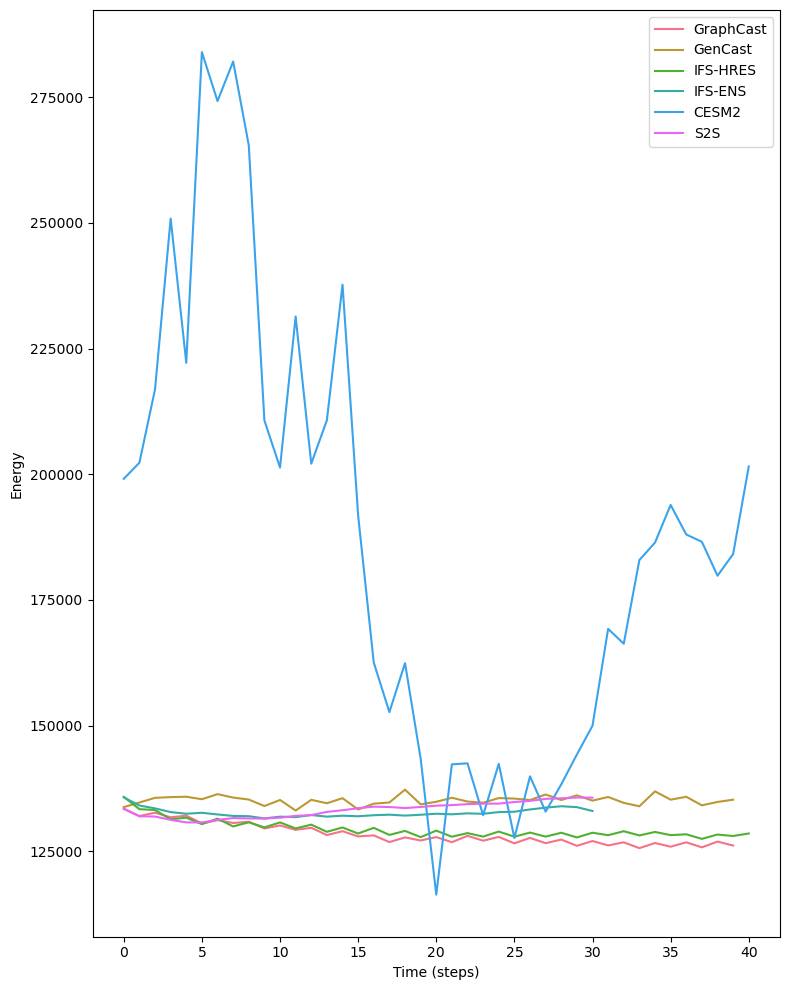

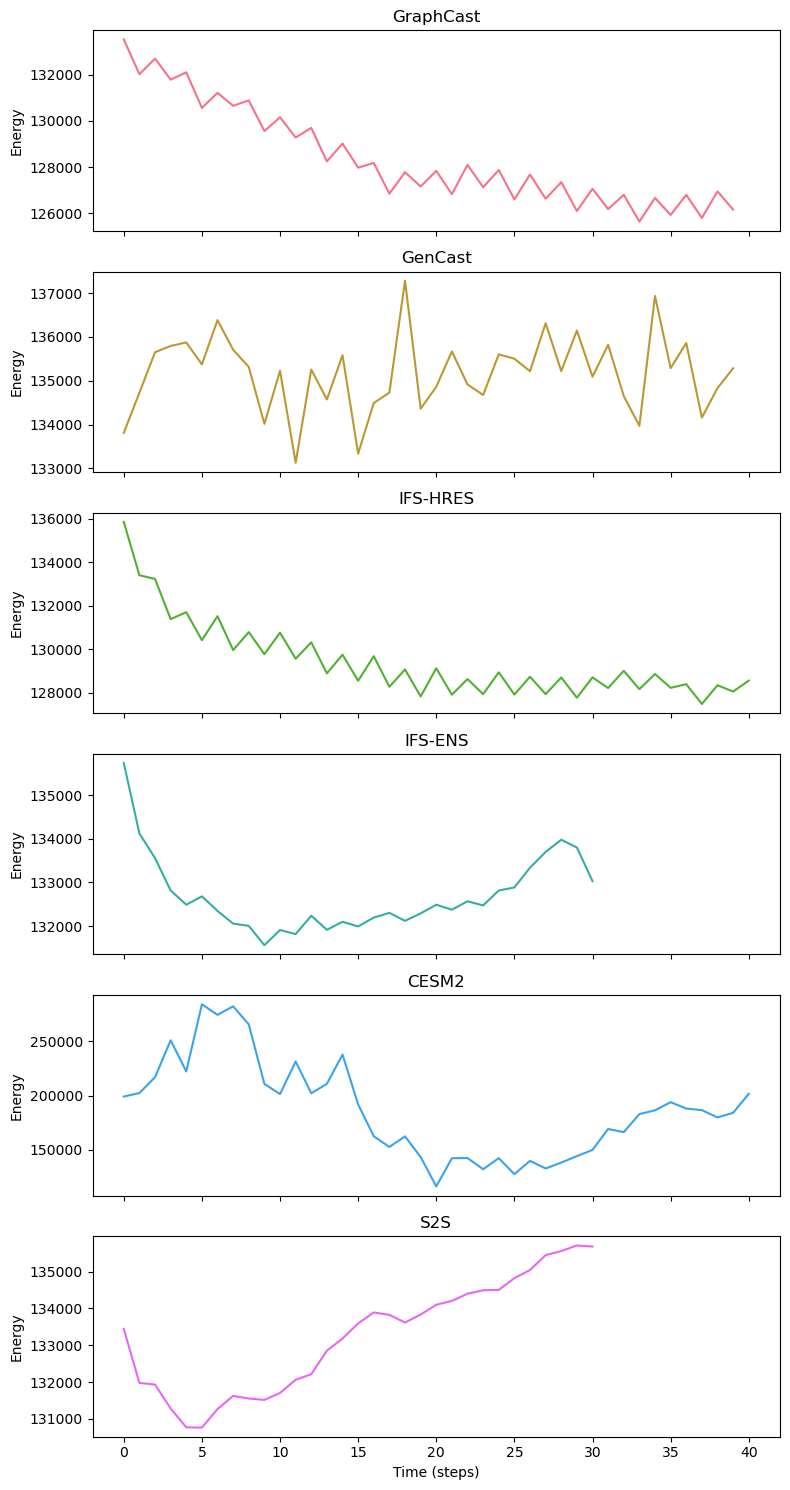

In [44]:
import xarray as xr
import numpy as np

model = {
    "GraphCast": xr.open_zarr("/geodata2/S2S/DL/GC_output/2021/spectra.zarr").mean("initial_time").isel(time=slice(0,40)),
    "GenCast": xr.open_zarr("/geodata2/Gencast/output/2021/spectra.zarr").mean("initial_time").mean("ensemble"),
    "IFS-HRES": xr.open_zarr("/data/GC_output/analysis/NWP/IFS-HRES/2021/spectra.zarr").mean("initial_time"),
    "IFS-ENS": xr.open_zarr("/geodata2/S2S/DL/GC_output/IFS-ENS/spectra.zarr").mean("initial_time").mean("ensemble").sel(level=300),
    "CESM2": xr.open_dataset("/geodata2/Gencast/CESM2/1990_daily_spectra_uv.nc").isel(level=5),
    "S2S": xr.open_zarr("/data/GC_output/analysis/NWP/S2S/2021/spectra.zarr").sel(level=300).mean("initial_time").mean("ensemble")
}

interval = len(model["CESM2"].time) // 40
model["CESM2"] = model["CESM2"].isel(time=slice(0, None, interval))


for data in model.values():
    # calculate the energy by Parseval's theorem
    n = len(data["wavenumber"])
    data["energy"] = np.square(data["spectrum"]).sum("wavenumber")#/n

plt.figure(figsize=(8, 10))

colors = sns.color_palette("husl", 6)

# Plot energy for each model
for i, (key, data) in enumerate(model.items()):
    time_steps = len(data.time)
    plt.plot(range(0, time_steps), data["energy"][:time_steps], color=colors[i], label=key)

plt.xlabel("Time (steps)")
plt.ylabel("Energy")
plt.legend()
plt.tight_layout()
plt.savefig("energy timeseries.png")


fig, axes = plt.subplots(len(model), 1, figsize=(8, 15), sharex=True)
colors = sns.color_palette("husl", len(model))

for ax, (key, data), color in zip(axes, model.items(), colors):
    time_steps = len(data.time)
    ax.set_title(key)
    ax.plot(range(time_steps), data["energy"][:time_steps], color=color, label=key)
    ax.set_ylabel("Energy")

axes[-1].set_xlabel("Time (steps)")
plt.tight_layout()
# plt.savefig("energy model timeseries.png")